In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
candidats = ["Amosov", "Beglov" ,"Tihonova"]
candidat = 'Amosov'


In [46]:
df = pd.read_csv("elections_spb_governor_2019.csv", index_col=0)

In [58]:
tec_df = df.groupby("tec_number").aggregate({'Amosov' : 'sum', 'Beglov' : 'sum', 'All' :'sum', 'Tihonova' : 'sum'})
tec_df['percent'] = ((tec_df.Amosov + tec_df.Beglov + tec_df.Tihonova) / tec_df.All) * 100
tec_df.sort_values(by = 'percent', ascending = False)

,Amosov,Beglov,All,Tihonova,percent
tec_number,,,,,
99999,194,82,535,121,74.205607
18,5753,36632,94434,4453,49.598661
15,1718,9780,35191,2187,38.887784
13,2597,13274,47955,2585,38.486081
19,8379,37091,143014,7818,37.260688
8,4156,20635,84723,4604,34.695419
20,7061,33241,153988,10048,32.697353
9,5501,24219,106551,4945,32.533716
22,8526,27667,137381,7067,31.489071


In [62]:
for name in candidats:
    df['{}_percent'.format(name)] = df[name] / (df.Amosov + df.Beglov + df.Tihonova) * 100

In [74]:
df.loc[(df[df.valid > 100])['{}_percent'.format(candidat)].idxmax()].to_frame()

,99999
All,535.000000
get_by_commission,402.000000
issued_indoors,402.000000
issued_outdoors,0.000000
not_used,0.000000
in_portable_box,0.000000
in_stationary_box,400.000000
not_valid,3.000000
valid,397.000000
losted,0.000000


# Амосов набрал больше всего в процентах на цифровом участке

In [76]:
df['percent'] = (df.Amosov + df.Beglov + df.Tihonova) / df.All * 100

In [101]:
tec_max_min = df.groupby("tec_number").agg({"percent" : 'min'}).join(df.groupby('tec_number').agg({'percent' : 'max'}),
                                                           on = 'tec_number', lsuffix = "_min", rsuffix="_max")
tec_max_min['diff'] = tec_max_min.percent_max - tec_max_min.percent_min

In [113]:
print("#{} ТИК С НАИБОЛЬШЕЙ РАЗНИЦЕЙ".format(tec_max_min['diff'].idxmax()))

#11 ТИК С НАИБОЛЬШЕЙ РАЗНИЦЕЙ


In [93]:
df.groupby("tec_number").agg({"percent" : 'max'})

,percent
tec_number,
1,99.076923
2,100.000000
3,84.800000
4,100.000000
5,97.945205
6,56.547123
7,80.727273
8,93.076923
9,70.586171


In [116]:
df.groupby("tec_number").agg({'percent' : 'var'}).rename(columns = {'percent' : 'variance'})

,variance
tec_number,
1,188.133458
2,456.180020
3,69.108981
4,221.862618
5,131.018165
6,18.510552
7,63.873858
8,222.281371
9,112.210987


In [164]:
df['all_voted'] = df.Amosov + df.Beglov + df.Tihonova
results = df[['Amosov', 'Beglov', 'Tihonova', 'all_voted']].sum().to_frame().T
for name in candidats:
    results[name] = results[name] / results['all_voted'] * 100
results = np.round(results.to_numpy()[0][:-1])

In [171]:
for result, name in zip(results, candidats):
    print(name, "-" ,df[df["{}_percent".format(name)].astype('int') == result].shape[0], "участков с результатом {}%".format(int(result)))

Amosov - 148 участков с результатом 16%
Beglov - 95 участков с результатом 66%
Tihonova - 192 участков с результатом 17%


,percent,Amosov_percent
0,NaN,NaN
1,NaN,NaN
2,15.991799,20.418726
3,16.523000,20.963984
4,16.995053,16.723456
...,...,...
2003,99.160157,5.771474
2004,99.380005,4.353242
2005,99.555759,3.949742
2006,99.693541,1.288364


In [212]:
def plot_candidate_results(window_size = 5):
    plt.figure(figsize = (15,10))
    for idx, name in enumerate(candidats):
        tmp = df[["{}_percent".format(name), 'percent']].groupby("percent").aggregate({"{}_percent".format(name) : 'mean'}).reset_index()
        tmp = tmp.rolling(window=window_size, min_periods = 0).mean().dropna().to_numpy()
        plt.plot(tmp[:, 0], tmp[:, 1], label = name, alpha = 0.7)
        plt.title("РАЗМЕР ОКНА ДЛЯ СГЛАЖИВАНИЯ {}".format(window_size))
        plt.xlabel('явка')
        plt.ylabel('результат кандидата')
        plt.legend()

In [213]:
wind_sizes = [3,5,10,25,50]

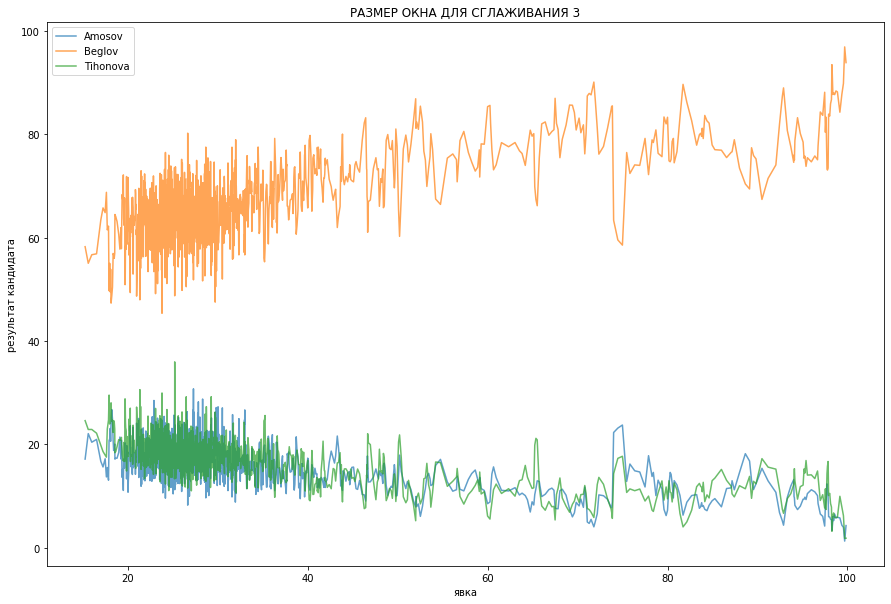

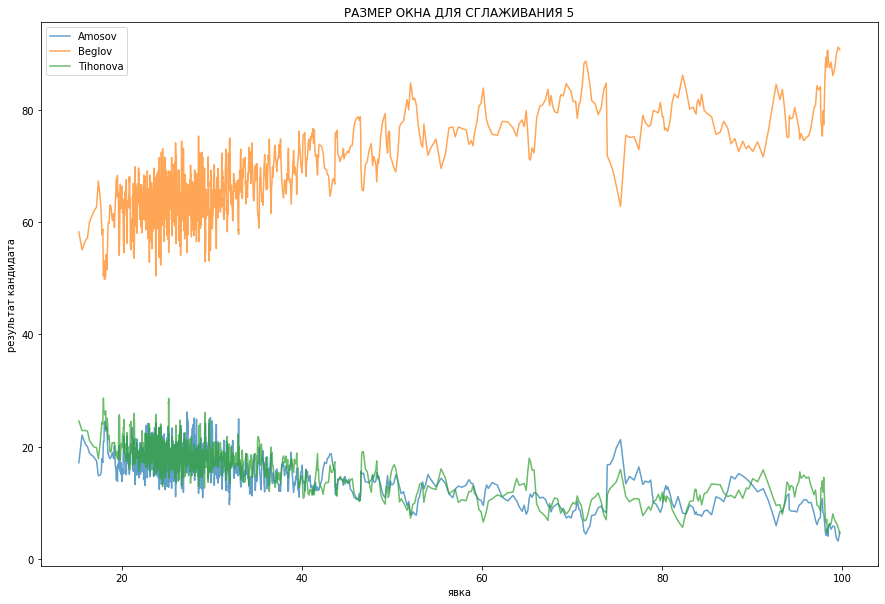

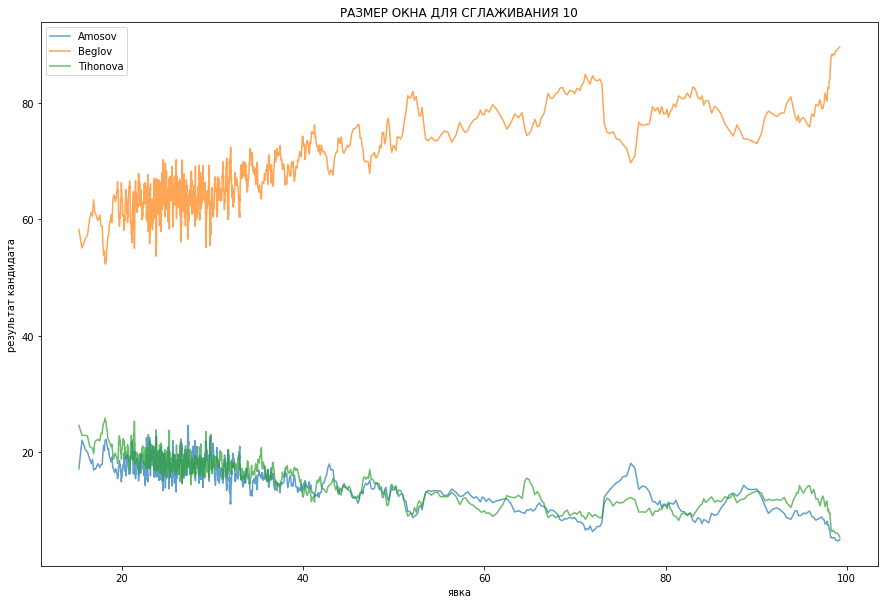

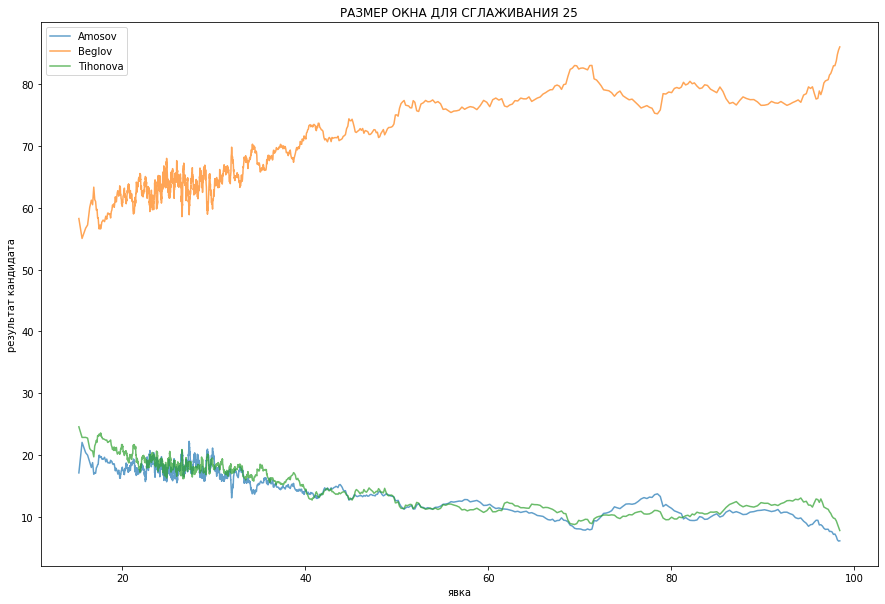

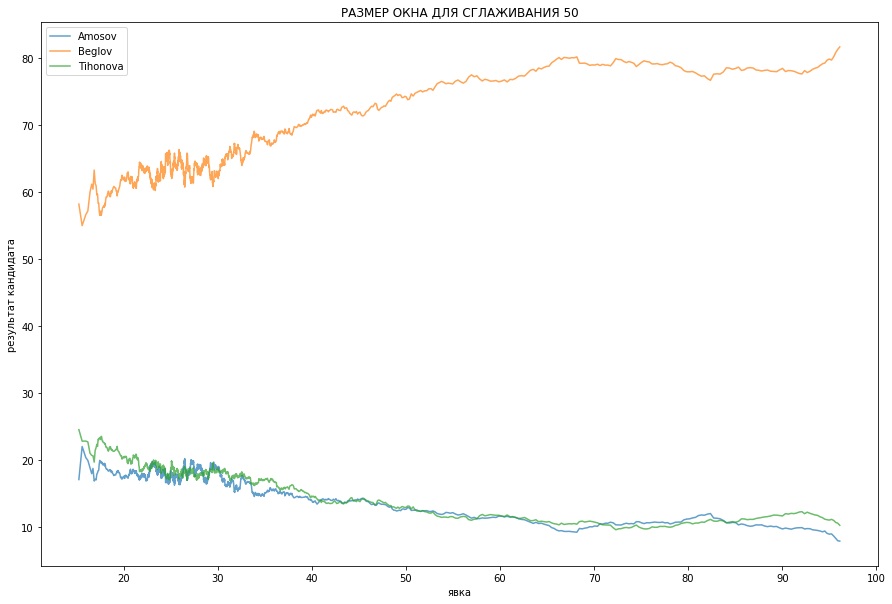

In [214]:
for size in wind_sizes:
    plot_candidate_results(size)